**HAND WRITTEN DIGIT PREDICTION - CLASSIFICATION ANALYSIS**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Import Data**

In [2]:
from sklearn.datasets import load_digits


In [3]:
df=load_digits()

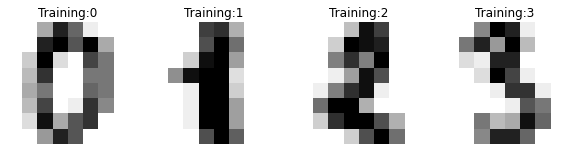

In [4]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images ,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training:%i" %label)

**Data Preprocessing**
**Flatten Image**

In [6]:
df.images.shape

(1797, 8, 8)

In [7]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df.images[0].shape

(8, 8)

In [9]:
n_sample=len(df.images)
data=df.images.reshape(n_sample,-1)

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

**Scaling Data**

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data=data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

**Train Test Split Data**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,train_size=0.7,random_state=3749)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
rff=RandomForestClassifier()

In [25]:
rff.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [26]:
y_pred=rff.predict(x_test)

In [27]:
y_pred

array([6, 6, 8, 8, 3, 2, 8, 5, 1, 6, 9, 2, 7, 0, 8, 1, 1, 8, 6, 6, 0, 0,
       2, 6, 7, 0, 9, 2, 9, 5, 7, 9, 1, 8, 3, 0, 6, 0, 7, 8, 7, 0, 4, 1,
       0, 4, 5, 3, 1, 6, 4, 6, 0, 1, 8, 3, 0, 4, 5, 3, 2, 7, 4, 2, 5, 5,
       0, 9, 4, 0, 7, 6, 0, 0, 9, 5, 1, 3, 9, 0, 9, 8, 9, 0, 2, 3, 3, 8,
       3, 1, 7, 6, 6, 3, 5, 1, 5, 5, 7, 9, 6, 5, 9, 9, 5, 3, 3, 4, 3, 1,
       6, 0, 3, 5, 5, 4, 5, 3, 6, 1, 0, 2, 0, 0, 3, 3, 4, 4, 6, 1, 1, 1,
       2, 5, 9, 6, 4, 5, 4, 1, 2, 6, 6, 5, 6, 0, 4, 8, 6, 7, 3, 4, 2, 2,
       4, 9, 7, 1, 3, 6, 1, 5, 8, 9, 7, 9, 4, 8, 0, 8, 1, 9, 5, 3, 2, 2,
       0, 0, 5, 4, 5, 7, 8, 3, 3, 9, 1, 3, 9, 1, 8, 5, 7, 5, 3, 5, 5, 0,
       9, 2, 7, 0, 4, 4, 1, 3, 4, 3, 0, 8, 2, 1, 4, 9, 3, 9, 7, 8, 3, 6,
       3, 4, 8, 3, 3, 2, 7, 8, 0, 1, 4, 6, 6, 6, 1, 0, 7, 3, 3, 0, 2, 1,
       7, 7, 4, 4, 2, 5, 5, 7, 1, 0, 8, 8, 0, 6, 5, 7, 8, 6, 0, 4, 8, 0,
       7, 6, 6, 1, 1, 4, 3, 1, 3, 7, 5, 2, 0, 1, 5, 0, 5, 9, 1, 1, 9, 7,
       7, 5, 8, 9, 6, 8, 7, 1, 7, 6, 5, 2, 8, 9, 1,

**Model Accuracy**

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)


array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 57,  1,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  1,  0],
       [ 0,  3,  1,  0,  1,  0,  0,  0, 49,  1],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  0, 52]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.92      1.00      0.96        56
           2       0.97      0.97      0.97        40
           3       0.98      0.98      0.98        59
           4       0.96      1.00      0.98        54
           5       0.97      0.95      0.96        60
           6       0.98      0.98      0.98        61
           7       0.98      0.98      0.98        44
           8       0.96      0.89      0.92        55
           9       0.98      0.93      0.95        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

